In [2]:
import requests
import matplotlib.pyplot as plt
import time

In [3]:
approx_duration = 17 * 60  
time_interval = 10
data_points = []

In [4]:
time_final = time.time() + approx_duration

while time.time() < time_final and len(data_points) < 100:
    results = requests.get('http://api.open-notify.org/iss-now.json')
    
    if results.status_code == 200:
        data = results.json()
        latitude = float(data['iss_position']['latitude'])
        longitude = float(data['iss_position']['longitude'])
        timestamp = data['timestamp']
        data_points.append({'latitude': latitude, 'longitude': longitude, 'timestamp': timestamp})
        
    time.sleep(time_interval)

In [5]:
latitudes = [data_point['latitude'] for data_point in data_points]
longitudes = [data_point['longitude'] for data_point in data_points]

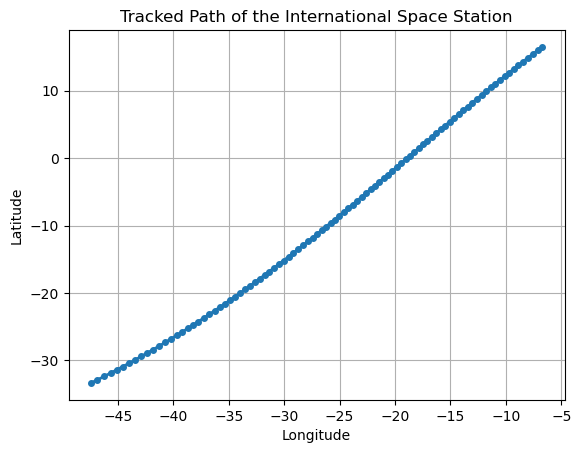

In [6]:
plt.plot(longitudes, latitudes, '-o', markersize=4, linewidth=2)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Tracked Path of the International Space Station')
plt.grid(True)
plt.show()